In [18]:
import numpy as np
import keras 
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [21]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


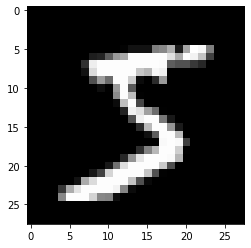

In [22]:
plt.imshow(X_train[0], cmap='gray')

In [23]:
y_train[0]

5

In [24]:
X_train = np.expand_dims(X_train, axis = 3)
X_test = np.expand_dims(X_test, axis = 3)

In [25]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [26]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [27]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
X_train, X_test = X_train/255, X_test/255

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import MaxPooling2D, Conv2D

def my_convnet_1():
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape = (28,28, 1), activation = 'relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(16, (3,3), activation = 'relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

    return model



In [30]:
model = my_convnet_1()

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)              

In [32]:
history = model.fit(X_train, y_train, epochs=8, validation_split=0.2, batch_size=256, verbose=1, shuffle=True)


Epoch 1/8
188/188 [==============================] - 34s 103ms/step - loss: 0.5585 - accuracy: 0.8144 - val_loss: 0.0869 - val_accuracy: 0.9729
Epoch 2/8
188/188 [==============================] - 19s 100ms/step - loss: 0.1239 - accuracy: 0.9632 - val_loss: 0.0563 - val_accuracy: 0.9833
Epoch 3/8
188/188 [==============================] - 18s 94ms/step - loss: 0.0935 - accuracy: 0.9718 - val_loss: 0.0617 - val_accuracy: 0.9831
Epoch 4/8
188/188 [==============================] - 16s 88ms/step - loss: 0.0812 - accuracy: 0.9767 - val_loss: 0.0531 - val_accuracy: 0.9867
Epoch 5/8
188/188 [==============================] - 17s 91ms/step - loss: 0.0746 - accuracy: 0.9764 - val_loss: 0.0472 - val_accuracy: 0.9876
Epoch 6/8
188/188 [==============================] - 17s 89ms/step - loss: 0.0659 - accuracy: 0.9792 - val_loss: 0.0514 - val_accuracy: 0.9846
Epoch 7/8
188/188 [==============================] - 17s 89ms/step - loss: 0.0675 - accuracy: 0.9806 - val_loss: 0.0514 - val_accuracy: 0.98

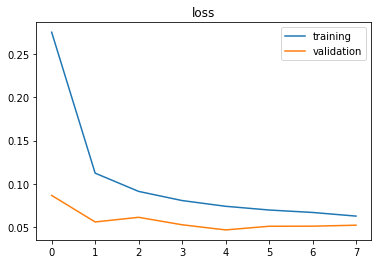

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['training', 'validation'])
plt.show()

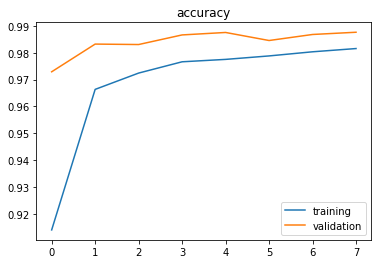

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['training', 'validation'])
plt.show()

In [35]:
score = model.evaluate(X_test, y_test, verbose = 0)


In [36]:
print('error',score[0])
print('accuracy',score[1])

error 0.043606847524642944
accuracy 0.9883000254631042


In [37]:
model.save('CNN_model.h5')